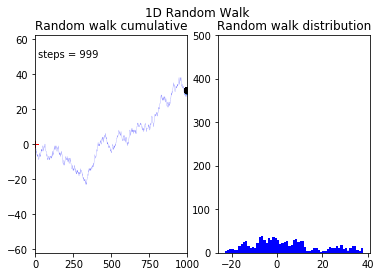

In [121]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML


# Define parameters for the walk

dims = 1
step_n = 1000
step_set = [-1, 0, 1] #options where to go
origin = np.zeros((1,dims)) #from where to start, creates zeros matrix of dimension corresponding to RW dimension


# Simulate steps in 1D

step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape) #randomly take Nr.-of-Steps times one direction
path = np.concatenate([origin, steps]).cumsum(0) #sum how far we got 
##put together starting position and then sequence of steps, then apply cumsum over columns
start = path[:1] #take the first element of the past
stop = path[-1:] #take the last element of the past

bin_edges = np.arange(min(path),max(path)+1)



# Set up the figure, the axis, and the plot element we want to animate

fig = plt.figure()
#ax = fig.add_subplot(111, aspect='equal', autoscale_on=False)#, xlim=(-2, 2), ylim=(-2, 2)) #possibility for constant window

#set subplots
ax = fig.add_subplot(121, xlim=(-1, step_n+1), ylim=(-2*int(np.sqrt(step_n+1)), 2*int(np.sqrt(step_n+1))))#(-step_n/2,step_n/2)))
ax.set_title('Random walk cumulative')

binom_ax = fig.add_subplot(122, ylim=(0,step_n/2))
binom_ax.set_title('Random walk distribution')

#create our line object which will be modified in the animation, 
#here we simply plot an empty line, we'll add data to the line later.
line, = ax.plot([], [], 'o-', lw=2)
#time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes) # we can add time
steps_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
fig.suptitle('1D Random Walk')



# Initialization function: plot the background of each frame

def init():
    """initialize animation"""
    line.set_data([], [])
    #time_text.set_text('')
    steps_text.set_text('') # to have steps shown on the screen
    return line, steps_text



# Animation function. This is called sequentially, this is the function which is actually plotted

def animate(i):
    x = i                # have steps
    y = path[i]          # get the distance where we are at i-th step
    line.set_data(x, y)  # tuple which will be animated, steps and distance
    #print(x,y)
    #ax.plot(start[:,0], start[:,1],c= 'red', marker='+') #for 2D
    ax.plot(0, start[:,0],c= 'red', marker='+')           # to plot starting point as a red cross
    #ax.plot(stop[:,0], stop[:,1],c='black', marker='o') #for 2D
    ax.plot(step_n, stop[:,0],c='black', marker='o')      # to plot ending point as a black dot
    binom_ax.hist(path[:i], bins = bin_edges, color = 'b')#, density = True) # plot the distribution
    #hist, bin_edges = binom_ax.hist(path[:i]) #np.histogram(path, density=True) # this should set bin-edges, does not work
    
    steps_text.set_text('steps = %i' % i)   #write in the plot the current step
    return line, steps_text


# Plot the whole path and histogram behind the data to make it nicer

#ax.plot(path[:,0], path[:,1],c= 'blue',alpha=0.5,lw=0.25,ls='-'); # for 2D
ax.plot(path[:,0],c= 'blue',alpha=0.5,lw=0.25,ls='-');
binom_ax.hist(path[:,0], bins = bin_edges, color = 'b',alpha=0.2)#, density = True)
    

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim_2plots = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=step_n, interval=100, blit=True)



# Save the animation as an mp4  

# This requires ffmpeg or mencoder to be installed.  The extra_args ensure that the x264 codec is used, 
# so that the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

anim_2plots.save('RandomWalk_animation_Nsteps_'+str(step_n)+'.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [74]:
path[:2]
stop[:,0]
print(max(max(path), -min(path)), 'max', max(path), -min(path))
np.arange(min(path),max(path)+1)

[5.] max [2.] [5.]


array([-5., -4., -3., -2., -1.,  0.,  1.,  2.])

In [119]:
HTML(anim_2plots.to_html5_video())

ValueError: too many values to unpack (expected 2)

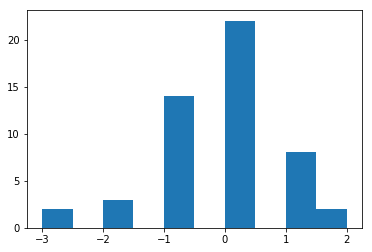

In [89]:
plt.hist(path)
hist, bin_edges = np.histogram(path, density=True)
hist, bin_edges = binom_ax.hist(path)

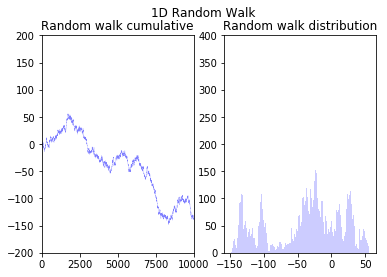

In [166]:
# jsut plot it
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.stats import binom


# Define parameters for the walk

dims = 1
step_n = 10000
step_set = [-1, 0, 1] #options where to go
origin = np.zeros((1,dims)) #from where to start, creates zeros matrix of dimension corresponding to RW dimension

#generate binomial distribution

p = 0.5
x = np.arange(1, step_n)

# Simulate steps in 1D

step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape) #randomly take Nr.-of-Steps times one direction
path = np.concatenate([origin, steps]).cumsum(0) #sum how far we got 
##put together starting position and then sequence of steps, then apply cumsum over columns
start = path[:1] #take the first element of the past
stop = path[-1:] #take the last element of the past

bin_edges = np.arange(min(path),max(path)+1)



# Set up the figure, the axis, and the plot element we want to animate

fig = plt.figure()
#ax = fig.add_subplot(111, aspect='equal', autoscale_on=False)#, xlim=(-2, 2), ylim=(-2, 2)) #possibility for constant window

#set subplots
ax = fig.add_subplot(121, xlim=(-1, step_n+1), ylim=(-2*int(np.sqrt(step_n+1)), 2*int(np.sqrt(step_n+1))))#(-step_n/2,step_n/2)))
ax.set_title('Random walk cumulative')

binom_ax = fig.add_subplot(122, ylim=(0,4*int(np.sqrt(step_n+1))))
binom_ax.set_title('Random walk distribution')

fig.suptitle('1D Random Walk')

# Plot the whole path and histogram behind the data to make it nicer

#ax.plot(path[:,0], path[:,1],c= 'blue',alpha=0.5,lw=0.25,ls='-'); # for 2D
ax.plot(path[:,0],c= 'blue',alpha=0.5,lw=0.25,ls='-');
binom_ax.hist(path[:,0], bins = bin_edges, color = 'b',alpha=0.2)#, density = True)
   

#plt.savefig('RandomWalk_animation_Nsteps_'+str(step_n)+'_2.png', dpi=150)

plt.show()

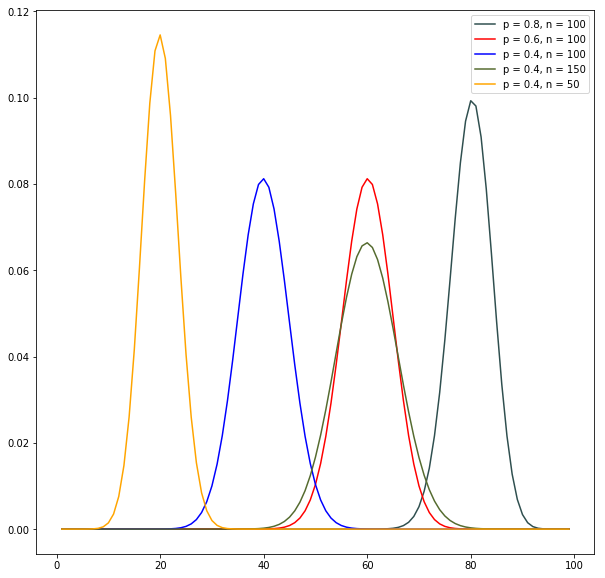

In [176]:
#generate binomial distribution
colour = ['darkslategray', 'blue', 'darkolivegreen', 'orange']

n, p = 100, 0.6
#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = np.arange(1, n)

plt.figure(figsize=(10,10))
plt.plot(x, binom.pmf(x, n, 0.8), color = 'darkslategray', label = 'p = {}, n = {}'.format(0.8,n))
plt.plot(x, binom.pmf(x, n, p), color = 'r', label = 'p = {}, n = {}'.format(p,n))
plt.plot(x, binom.pmf(x, n, 0.4), color = 'blue', label = 'p = {}, n = {}'.format(0.4,n))
plt.plot(x, binom.pmf(x, 150, 0.4), color = 'darkolivegreen', label = 'p = {}, n = {}'.format(0.4,150))
plt.plot(x, binom.pmf(x, 50, 0.4), color = 'orange', label = 'p = {}, n = {}'.format(0.4,50))
#binom.ppf(0.01, n, p)
plt.legend()

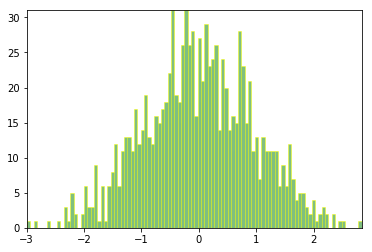

In [59]:
"""
==================
Animated histogram
==================

This example shows how to use a path patch to draw a bunch of
rectangles for an animated histogram.

"""
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

In [60]:
HTML(ani.to_html5_video())